In [178]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [179]:
from sklearn.preprocessing import MinMaxScaler,label_binarize
from sklearn.model_selection import train_test_split,GridSearchCV,validation_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,auc,roc_curve,classification_report

In [180]:
data = pd.read_csv("weather_classification_data.csv")
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [181]:
print(data.isna().sum())
print(data.duplicated().sum())
print(data.info())


print(data["Weather Type"].unique())




Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13

In [182]:
print(data.describe()) 


        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%

In [183]:
# data.columns
new_order  = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index','Visibility (km)','Cloud Cover', 'Season', 'Location', 'Weather Type']
data = data[new_order]

data["Temperature"].min()



-25.0

## EDA

The following plot illustrates the frequency distribution and summary of data, focusing exclusively on numerical variables.

Histogram: This plot shows how data points are distributed across different values, providing a visual representation of the frequency of data points within specified ranges.
Box Plot: This plot highlights the interquartile range (IQR), indicating how data is concentrated within this range, and also displays the median, offering insights into the central tendency of the dataset

In our dataset, the integer-type variables are Temperature, Humidity, Wind Speed, and Precipitation. We observed that Wind Speed and Precipitation contain outliers. These outliers represent rare cases, and it is uncertain whether such extreme values for Temperature and Wind Speed will recur. Therefore, we chose not to handle or remove these outliers.

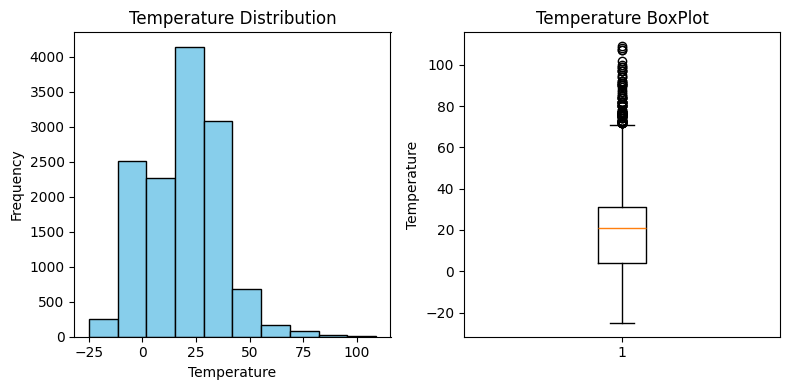

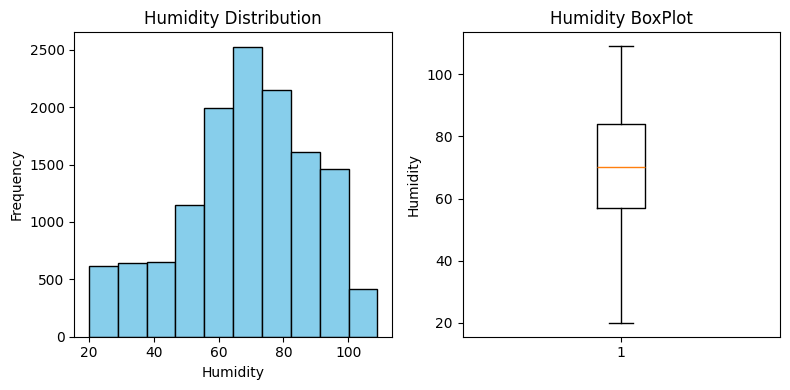

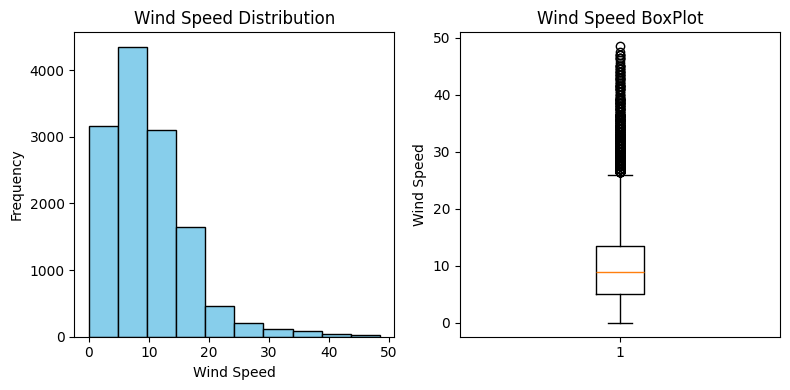

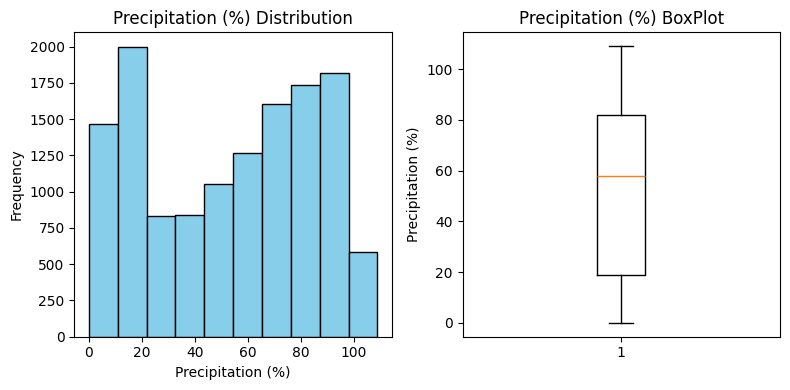

In [184]:
def Plot_1(data, col):
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(data[col], bins=10, edgecolor='black',color= 'skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} Distribution')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(data[col])
    plt.ylabel(col)
    plt.title(f'{col} BoxPlot')
    
    plt.tight_layout()
    plt.show()

for i in range(4):
    Plot_1(data, data.columns[i])


The following plot is a bar plot analysis of categorical variables within the dataset, clearly showing the percentage of data points for each category. The dataset includes three categorical columns: Cloud Cover, Season, and Location. Although Weather Type is also present, it serves as our target variable.

This count plot visually represents the frequency of different categories for Cloud Cover, Season, and Location in the dataset. The bars are sorted by percentage, allowing us to easily verify which types of cloud cover, locations, and seasons are most prevalent in the data.

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\3250176690.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




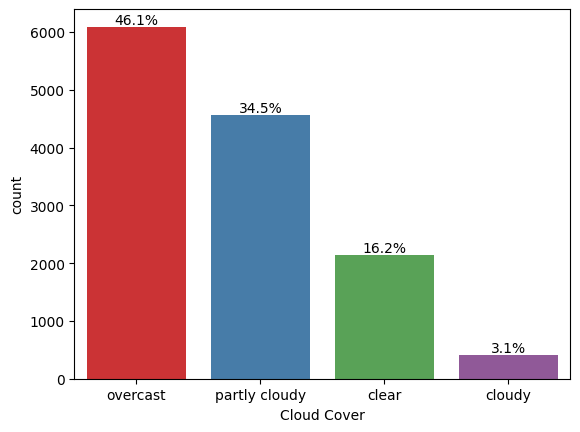

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\3250176690.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




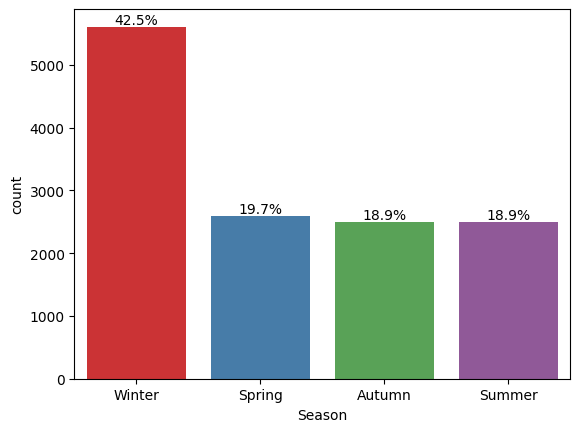

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\3250176690.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




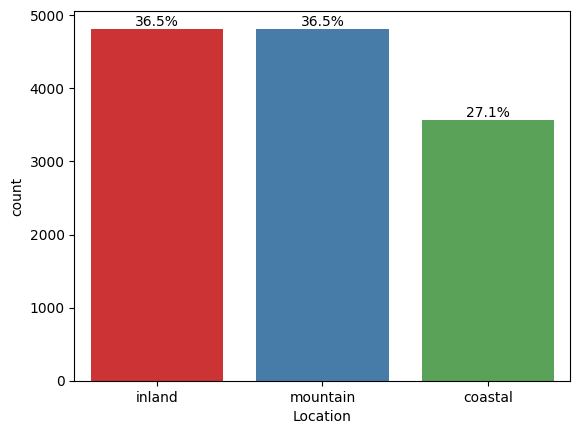

In [185]:
def Plot_2(data, col):

    palette = sns.color_palette("Set1", len(data[col].unique()))
    count = sns.countplot(data=data, x=col, order=data[col].value_counts().index,palette= palette)
    total = len(data)
    
    for p in count.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        count.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.show()

for i in range(-4,-1):
    Plot_2(data,data.columns[i])

the below plot shows the visulization about my X varaible with my y variable so hear my y = weather type i have just plot the colored compared plot with below with all other variable 

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\2282917058.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




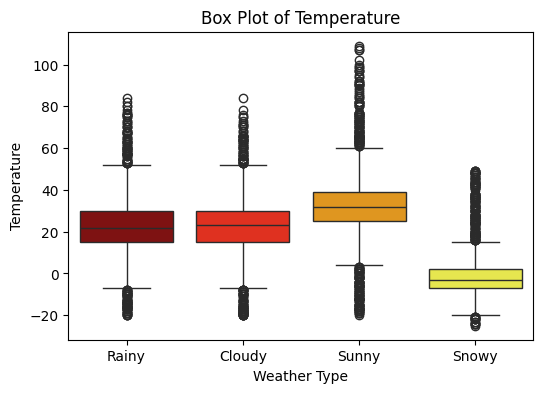

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\2282917058.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




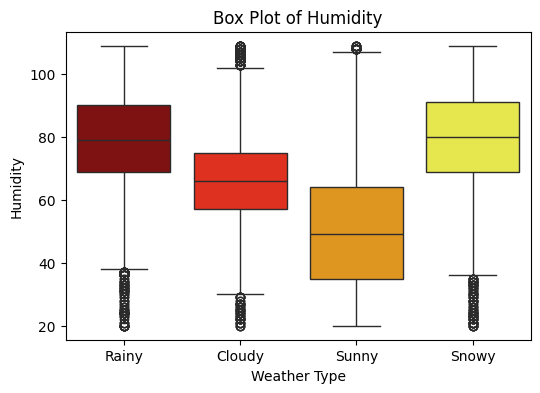

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\2282917058.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




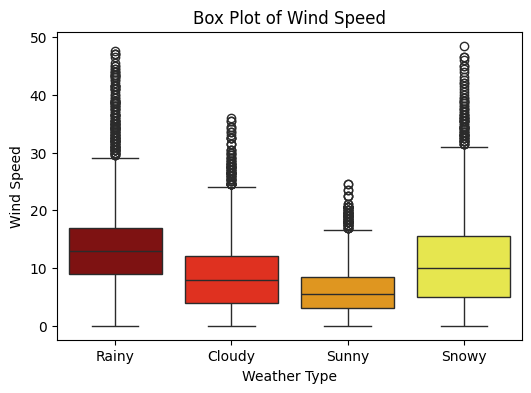

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\2282917058.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




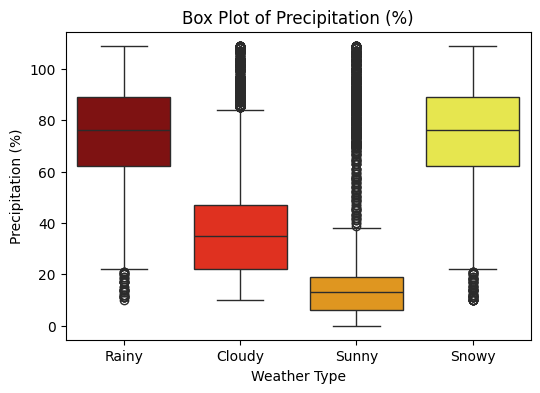

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\2282917058.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




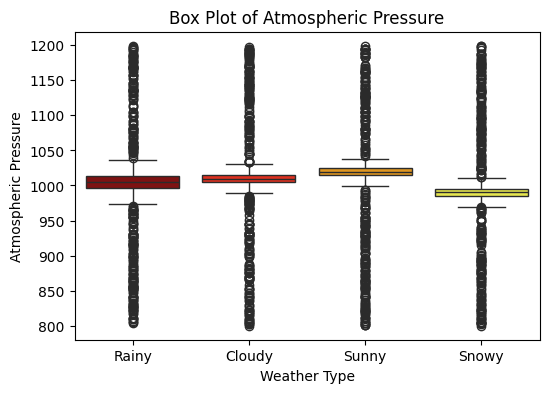

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\2282917058.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




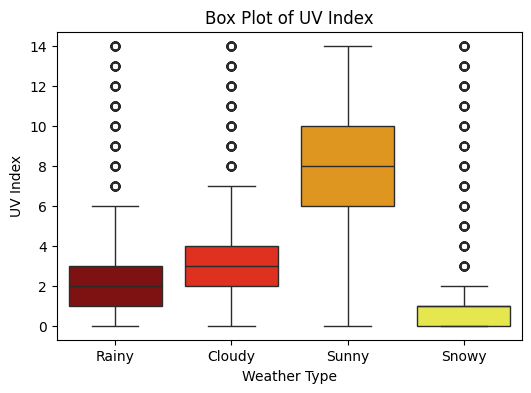

C:\Users\sneha\AppData\Local\Temp\ipykernel_20144\2282917058.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




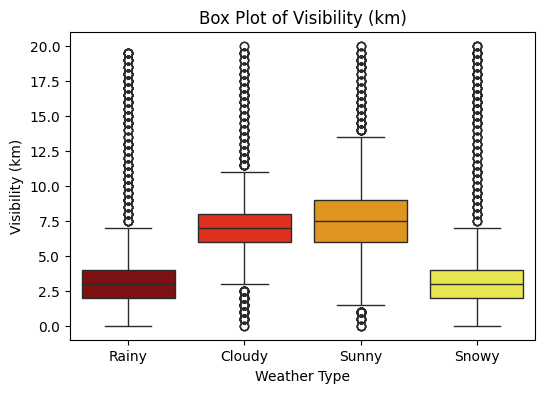

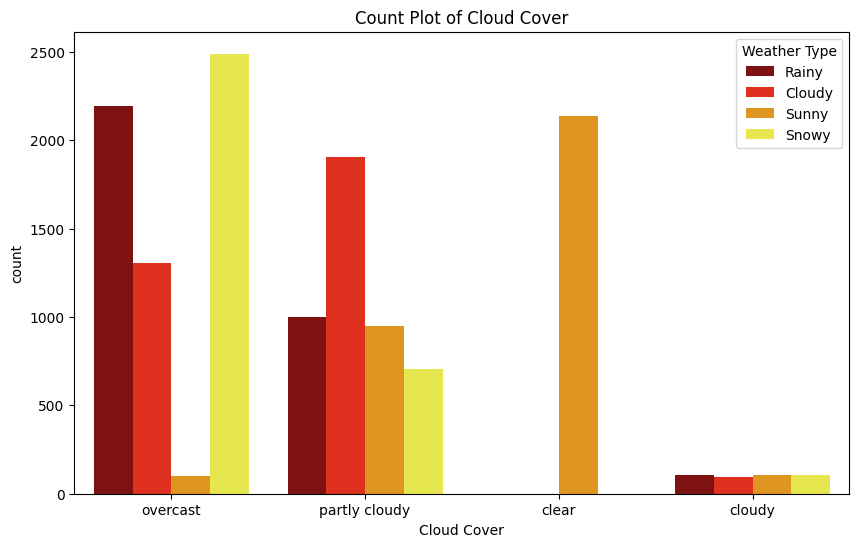

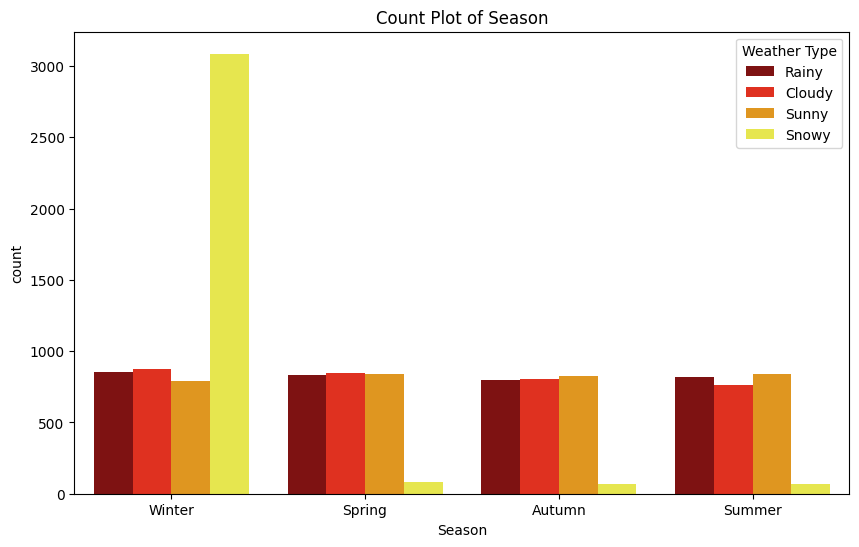

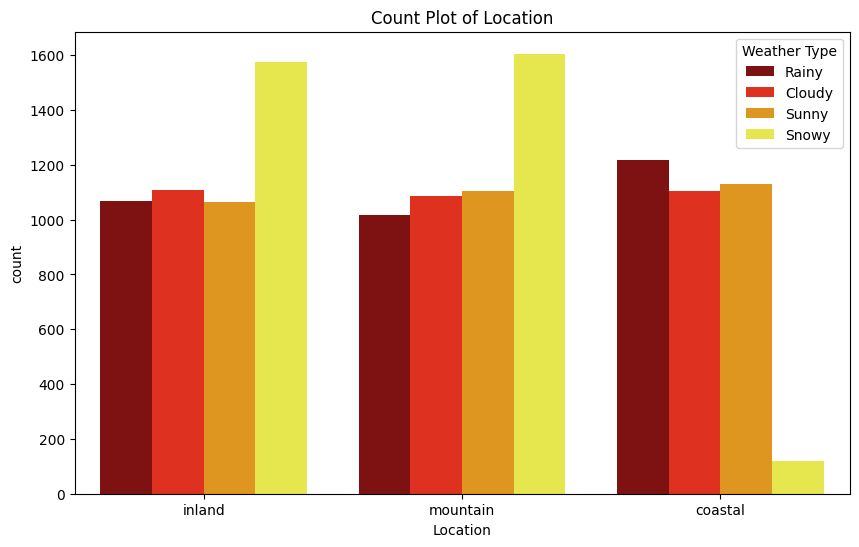

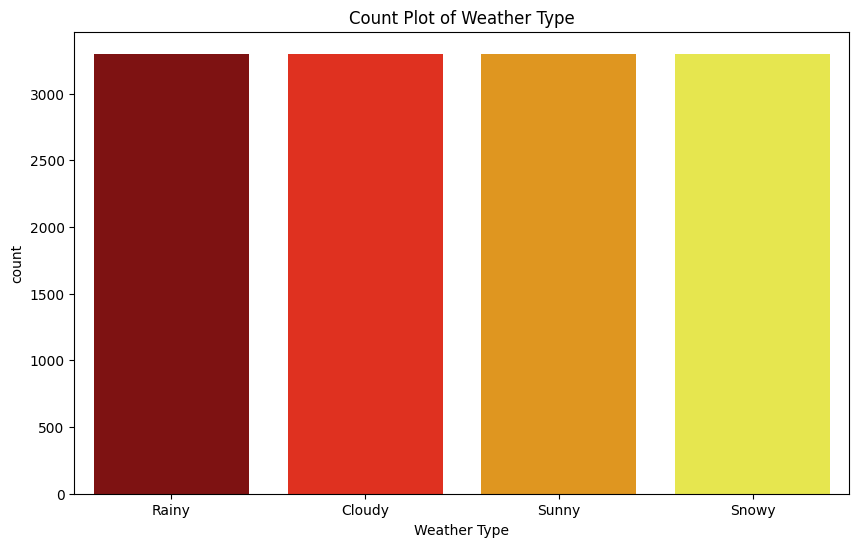

[None, None, None, None, None, None, None, None, None, None, None]

In [186]:
target = data["Weather Type"]

def Plot_3(data, col):
    if data[col].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=col, hue=target, palette='hot', order=data[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.show()
    else:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=data, x=target, y=col, palette='hot')
        plt.title(f'Box Plot of {col}')
        plt.show()

[Plot_3(data,col) for col in data.columns]


Hear we perform one hot encoding for catagorical variable i.e(Cloud cover,Season,location)and for taget varaible we perform label encoding because the above above weather type plot explain me the data of 

## One hot encoding

For the columns ‘Cloud Cover’, ‘Season’, and ‘Location’, I performed one-hot encoding to handle the categorical data. The categories within these columns have different relationships with each other, but they all influence the weather type. The data appears balanced across these categories, as indicated by the above plot. This ensures that the model can effectively learn from all relevant features without bias towards any particular category.

Additionally, one-hot encoding helps in converting categorical variables into a format that can be provided to ML algorithms to improve predictions. By including all these encoded features, we ensure that the model captures the nuanced relationships between different weather conditions and the target variable.

In [187]:
data_1 = pd.get_dummies(data, columns=['Cloud Cover', 'Season', 'Location']) # one hot encoding 

data_1["Weather Type"] = pd.factorize(data["Weather Type"])[0] +1 # factorize 

data_1


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,1,False,False,False,True,False,False,False,True,False,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,2,False,False,False,True,False,True,False,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,3,True,False,False,False,False,True,False,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,3,True,False,False,False,False,True,False,False,True,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,1,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,1,False,False,True,False,False,False,True,False,False,False,True
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,4,False,True,False,False,False,False,False,True,True,False,False
13197,30.0,77,5.5,28.0,1012.69,3,9.0,2,False,False,True,False,True,False,False,False,True,False,False
13198,3.0,76,10.0,94.0,984.27,0,2.0,4,False,False,True,False,False,False,False,True,False,True,False


The correlation plot below illustrates the relationships between each column in the dataset. It clearly shows that humidity, wind speed, and precipitation are highly positively correlated. However, I have considered all elements in the dataset for analysis, as each variable has some relationship with the weather type. Therefore, I included all variables in the model operation.

In [188]:
correlation= data_1.corr()
fig = px.imshow(correlation,
                text_auto = True,
                aspect = "auto",
                color_continuous_scale='YlOrRd',
                title='Correlation Matrix')

fig.update_layout(xaxis = dict(tickangle = -45),width = 1500,height = 900)
fig.show()

### Train test split operation 

In [189]:
X = data_1.drop("Weather Type",axis = 1)
y = data_1['Weather Type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(9240, 18)
(3960, 18)
(9240,)
(3960,)


### Scaling the splitted dataset 


In [190]:
Scalar = MinMaxScaler()
X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)
X_test

array([[0.35338346, 0.20224719, 0.09278351, ..., 0.        , 1.        ,
        0.        ],
       [0.64661654, 0.83146067, 0.29896907, ..., 0.        , 1.        ,
        0.        ],
       [0.48120301, 0.34831461, 0.04123711, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.20300752, 0.50561798, 0.40206186, ..., 0.        , 0.        ,
        1.        ],
       [0.42105263, 0.24719101, 0.08247423, ..., 1.        , 0.        ,
        0.        ],
       [0.35338346, 0.03370787, 0.06185567, ..., 1.        , 0.        ,
        0.        ]])

In [191]:
def Plot_5(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fig = px.imshow(
        conf_matrix,
        labels=dict(x="Predicted Label", y="True Label", color="Count"),
        x=['Rainy', 'Cloudy', 'Sunny', 'Snowy'],
        y=['Rainy', 'Cloudy', 'Sunny', 'Snowy'],
        text_auto=True,
        color_continuous_scale="Viridis"
    )
    
    fig.update_layout(title='Confusion Matrix',width = 800,height = 400)
    fig.show()


### LogisticRegression

In [192]:

Model_LR = LogisticRegression(solver='saga')
Model_LR.fit(X_train, y_train)

LR_Paramater_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

LR_Paramater_Search = GridSearchCV(estimator=LogisticRegression(solver = 'saga'),
                                   param_grid= LR_Paramater_grid,
                                   cv = 5,scoring="accuracy")
LR_Paramater_Search.fit(X_train,y_train)
y_pred_LR = LR_Paramater_Search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LR)
Confusion_LR = confusion_matrix(y_test, y_pred_LR)


c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\sneha\AppData\Local\Progra

In [193]:
print("Logistic Regression - Best Params:", LR_Paramater_Search.best_params_)
print("Logistic Regression - Best Estimator:",LR_Paramater_Search.best_estimator_)
print("Logistic Regression - Best Score:",LR_Paramater_Search.best_score_)
print(Confusion_LR)
print("Accuracy:", accuracy)
Plot_5(y_test, y_pred_LR)

Logistic Regression - Best Params: {'C': 10, 'penalty': 'l1'}
Logistic Regression - Best Estimator: LogisticRegression(C=10, penalty='l1', solver='saga')
Logistic Regression - Best Score: 0.8717532467532466
[[833  60  13  76]
 [ 88 800  33  34]
 [ 35  84 843  28]
 [ 13  35  17 968]]
Accuracy: 0.8696969696969697


### Decision Tree

In [194]:
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train,y_train)

Y_pred = Model_DT.predict(X_test)
DT_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
DT_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=DT_param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the model
DT_grid_search.fit(X_train, y_train)

y_pred_DT = DT_grid_search.predict(X_test)
accuracy_DT = accuracy_score(y_test,y_pred_DT)
Confusion_DT = confusion_matrix(y_test,y_pred_DT)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV

In [195]:
print("Decision Tree - Best Params:", DT_grid_search.best_params_)
print("Decision Tree - Best Estimator:", DT_grid_search.best_estimator_)
print("Decision Tree - Best Score:", DT_grid_search.best_score_)
print("Accuracy:",accuracy_DT)
print(Confusion_DT)
Plot_5(y_test,y_pred_DT)

Decision Tree - Best Params: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree - Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=4)
Decision Tree - Best Score: 0.9123376623376623
Accuracy: 0.9095959595959596
[[891  53  21  17]
 [ 56 852  29  18]
 [ 35  33 895  27]
 [ 21  30  18 964]]


##  Random Forest

In [196]:
Model_RF = RandomForestClassifier()
Model_RF.fit(X_train,y_train)


RF_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': [ 'sqrt', 'log2']   
}

RF_grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=RF_param_grid, scoring = 'accuracy',cv=5,verbose= 2)
RF_grid_search.fit(X_train, y_train)


y_pred_RF = RF_grid_search.predict(X_test)
accuracy_RF = accuracy_score(y_test,y_pred_RF)
Confusion_RF = confusion_matrix(y_test,y_pred_RF)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=sq

In [197]:
print("Accuracy:",accuracy_RF)
print(Confusion_RF)

print("Random Forest - Best Params:", RF_grid_search.best_params_)
print("Random Forest - Best Estimator:",RF_grid_search.best_estimator_)
print("Random Forest - Best Score:",RF_grid_search.best_score_)
Plot_5(y_test,y_pred_RF)

Accuracy: 0.9131313131313131
[[904  49  16  13]
 [ 60 852  20  23]
 [ 24  45 892  29]
 [ 20  31  14 968]]
Random Forest - Best Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Best Estimator: RandomForestClassifier(max_depth=20, n_estimators=200)
Random Forest - Best Score: 0.9185064935064936


### SVM

In [198]:
Model_SVM = SVC()
Model_SVM.fit(X_train, y_train)

svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}

svc_grid_search = GridSearchCV(estimator=SVC(), param_grid=svc_param_grid, cv=2,verbose=2,scoring="accuracy")
history = svc_grid_search.fit(X_train, y_train)

y_pred_SVM = svc_grid_search.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear; total time=   0.5s
[CV] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear; total time=   0.6s
[CV] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=rbf; total time=   2.4s
[CV] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=rbf; total time=   2.2s
[CV] END C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=linear; total time=   0.5s
[CV] END C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=linear; total time=   0.6s
[CV] END .C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=rbf; total time=   2.8s
[CV] END .C=0.1, coef0=0.0, degree=2, gamma=auto, kernel=rbf; total time=   2.8s
[CV] END C=0.1, coef0=0.0, degree=3, gamma=scale, kernel=linear; total time=   0.5s
[CV] END C=0.1, coef0=0.0, degree=3, gamma=scale, kernel=linear; total time=   0.6s
[CV] END C=0.1, coef0=0.0, degree=3, gamma=scale, kernel=rbf; total time=   2.3s
[CV] END C=0.1, coef0=0.0, deg

In [199]:
print("Accuracy:", accuracy_SVM)
print("SVM - Best Params:", svc_grid_search.best_params_)
print("SVM - Best Estimator:", svc_grid_search.best_estimator_)
print("SVM - Best Score:", svc_grid_search.best_score_)
Plot_5(y_test, y_pred_SVM)

Accuracy: 0.9
SVM - Best Params: {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
SVM - Best Estimator: SVC(C=10, degree=2)
SVM - Best Score: 0.9014069264069264
